# Project 1 Setion 1 - Assessment - Solved

# Import Libraries

In [53]:
# import libraries
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout
from tensorflow.keras import layers # added later to improve efficiency
import matplotlib.pyplot as plt
import numpy as np


# Define Functions

In [196]:
# support function to plot classification results
def evaluate(X_test, y_test, model):
  # evaluate
  test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
  print("Test accuracy:", test_acc)
  return test_acc

# support function to plot classification results
def test_model(X_test, y_test, model):
  # evaluate
  test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

  # plot
  plt.figure(figsize=(20, 7))
  for i in range(20):
      pred = np.argmax(model.predict(X_test[i].reshape(1, 32, 32, 3)))
      true_idx = int(np.argmax(y_test[i]))
      plt.subplot(4, 5, i+1)
      plt.imshow(X_test[i])
      ok = (pred == true_idx)
      title_text = f"Predicted: {labels[pred]}\n(Correct: {labels[true_idx]})"
      plt.title(title_text, color=("green" if ok else "red"), fontsize=9)
      plt.axis('off')
  plt.subplots_adjust(hspace=0.5, wspace=0.3)
  plt.show()
  print("Test accuracy:", test_acc)

# test one image
def test_single_image(test_image_index):
  # show image
  plt.imshow(X_test[test_image_index])

  # predict
  pred = np.argmax(model.predict(X_test[test_image_index].reshape(1, 32, 32, 3)))

  # get right answer
  true_idx = int(np.argmax(y_test[test_image_index]))


  print("Predicted Label: ", labels[pred])
  print("Correct  Label: ", labels[true_idx])

# plot history
def plot_history(history):
  plt.figure(figsize=(6, 4))

  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.title('Accuracy')
  plt.legend()

  plt.figure(figsize=(6, 4))
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title('Loss')
  plt.legend()

# Load Data

In [171]:
# load data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data()

In [172]:
# map labels
labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle',
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel',
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock',
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak', 'orange', 'orchid', 'otter', 'palm', 'pear', 'pickup_truck',
    'pine', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon',
    'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk',
    'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower',
    'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow', 'wolf',
    'woman', 'worm'
]

### Explore data

In [173]:
type(X_train)

numpy.ndarray

In [174]:
print("Train images:", X_train.shape)
print("Train labels:", y_train.shape)
print("Test images:", X_test.shape)
print("Test labels:", y_test.shape)


Train images: (50000, 32, 32, 3)
Train labels: (50000, 1)
Test images: (10000, 32, 32, 3)
Test labels: (10000, 1)


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [195, 205, 193],
        [212, 224, 204],
        [182, 194, 167]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [170, 176, 150],
        [161, 168, 130],
        [146, 154, 113]],

       [[255, 255, 255],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [189, 199, 169],
        [166, 178, 130],
        [121, 133,  87]],

       ...,

       [[148, 185,  79],
        [142, 182,  57],
        [140, 179,  60],
        ...,
        [ 30,  17,   1],
        [ 65,  62,  15],
        [ 76,  77,  20]],

       [[122, 157,  66],
        [120, 155,  58],
        [126, 160,  71],
        ...,
        [ 22,  16,   3],
        [ 97, 112,  56],
        [141, 161,  87]],

       [[ 87, 122,  41],
        [ 88, 122,  39],
        [101, 134,  56],
        ...,
        [ 34,  36,  10],
        [105, 133,  59],
        [138, 173,  79]]], dtype=uint8)
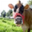

In [175]:
X_train[0]

In [176]:
# view labels
print("Unique labels:", np.unique(y_train)[:20], "...")  # show first 20
print("Number of classes:", len(np.unique(y_train)))

Unique labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] ...
Number of classes: 100


In [177]:
y_train[0]

array([19])

In [178]:
labels[19]

'cattle'

In [179]:
print("Label index:", y_train[0][0])
print("Class name:", labels[y_train[0][0]])


Label index: 19
Class name: cattle


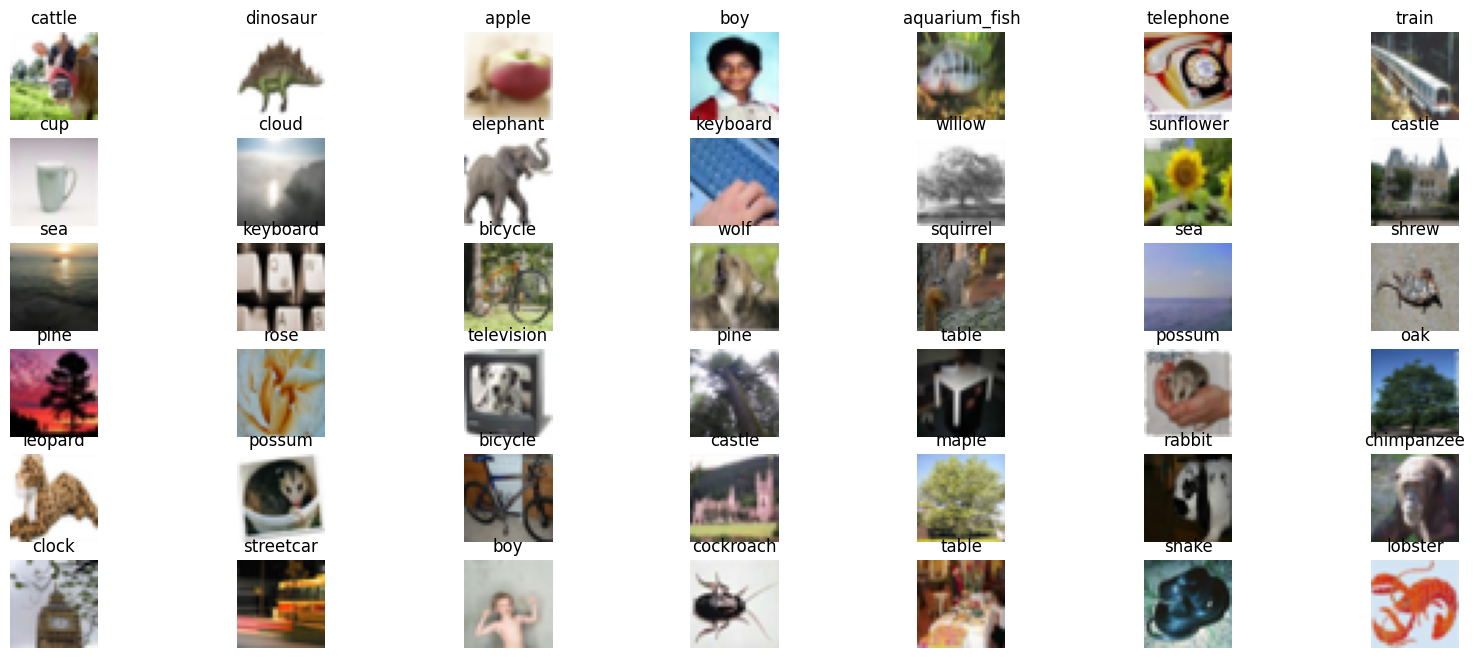

In [180]:
plt.figure(figsize=(20, 8))
for i in range(42):
    plt.subplot(6, 7, i+1)
    plt.imshow(X_train[i])
    plt.title(labels[y_train[i][0]])
    plt.axis('off')
plt.show()


In [181]:
y_train

array([[19],
       [29],
       [ 0],
       ...,
       [ 3],
       [ 7],
       [73]])

In [182]:
y_test

array([[49],
       [33],
       [72],
       ...,
       [51],
       [42],
       [70]])

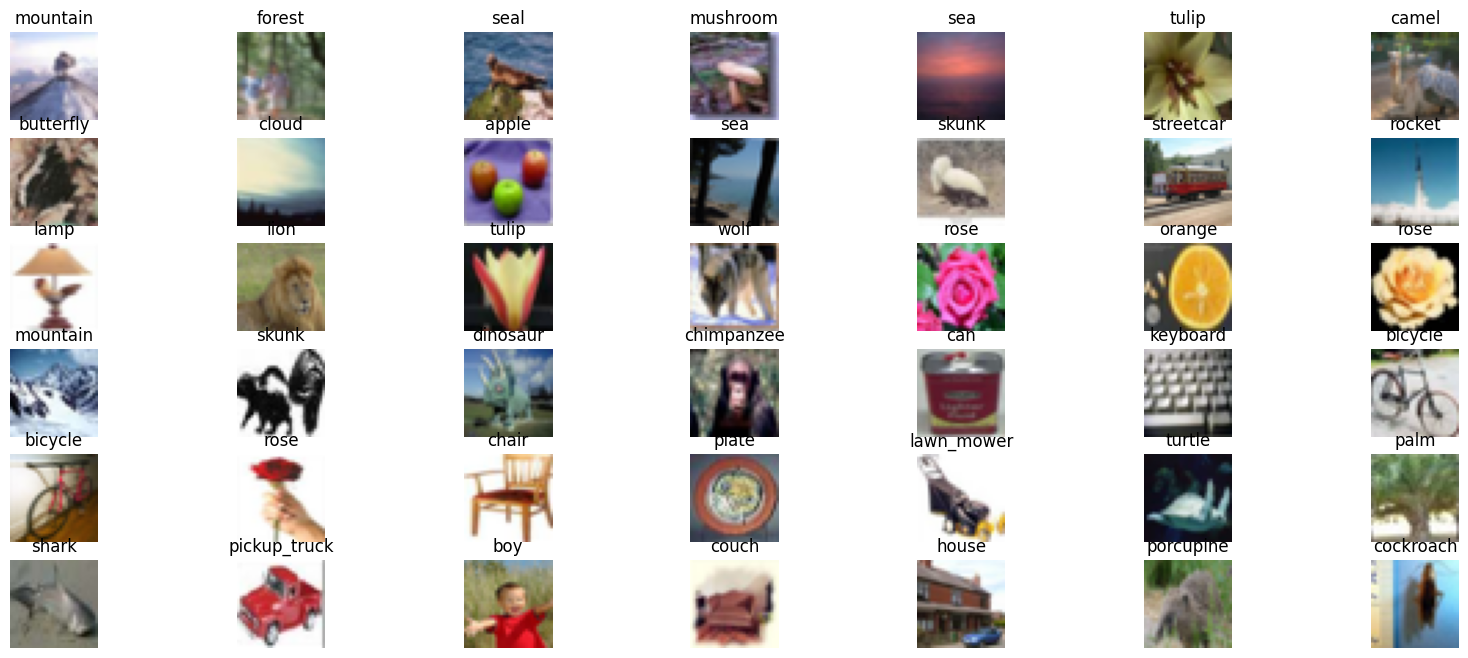

In [183]:
plt.figure(figsize=(20, 8))
for i in range(42):
    plt.subplot(6, 7, i+1)
    plt.imshow(X_test[i])
    plt.title(labels[y_test[i][0]])
    plt.axis('off')
plt.show()


## Prepare Data

In [184]:
# scale impages to 0:1
X_train = X_train/255.0
X_test = X_test/255.0

In [185]:
# one-hot encode
y_train = tf.keras.utils.to_categorical(y_train,)
y_test = tf.keras.utils.to_categorical(y_test)


# Model 1

In [186]:
# define model
model = tf.keras.Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

# summarise
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 556,708 (2.12 MB)

 Trainable params: 556,708 (2.12 MB)

 Non-trainable params: 0 (0.00 B)

In [187]:
# complie
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [188]:
# train
history = model.fit(X_train, y_train, epochs = 20, batch_size = 64 ,shuffle = True, validation_data=(X_test, y_test))

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.0210 - loss: 4.5488 - val_accuracy: 0.0792 - val_loss: 4.2423
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0570 - loss: 4.2494 - val_accuracy: 0.1275 - val_loss: 3.9282
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.0870 - loss: 4.0374 - val_accuracy: 0.1575 - val_loss: 3.7630
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.1064 - loss: 3.9077 - val_accuracy: 0.1782 - val_loss: 3.6360
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1254 - loss: 3.7921 - val_accuracy: 0.1948 - val_loss: 3.5434
Epoch 6/20
679/782 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1355 - loss: 3.7227

KeyboardInterrupt: 

## Quality Check

In [ ]:
# evaluate
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", test_acc)

## Test One image

In [ ]:
# Test 1

test_image_index = 2

test_single_image(test_image_index)

## Test Multiple

In [ ]:
test_model(X_test, y_test, model)

# Model 2

In [152]:
# Add data augumentation

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.1),
], name="augment")


In [160]:
# define model
model = tf.keras.Sequential([
    layers.Input(shape=(32, 32, 3)), # NEW
    data_augmentation,                                  # NEW
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ augment (Sequential)            │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 556,708 (2.12 MB)

 Trainable params: 556,708 (2.12 MB)

 Non-trainable params: 0 (0.00 B)

In [162]:
# complie
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [163]:
# train
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-5, verbose=1)
]
history = model.fit(
    X_train, y_train,
    epochs=40,                  # was 20
    batch_size=64,
    shuffle=True,
    validation_data=(X_test, y_test),
    callbacks=callbacks         # NEW
)

Epoch 1/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.0196 - loss: 4.5467 - val_accuracy: 0.0761 - val_loss: 4.2005 - learning_rate: 1.0000e-04
Epoch 2/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.0612 - loss: 4.2369 - val_accuracy: 0.1230 - val_loss: 3.9503 - learning_rate: 1.0000e-04
Epoch 3/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.0876 - loss: 4.0443 - val_accuracy: 0.1550 - val_loss: 3.7515 - learning_rate: 1.0000e-04
Epoch 4/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1037 - loss: 3.9285 - val_accuracy: 0.1746 - val_loss: 3.6316 - learning_rate: 1.0000e-04
Epoch 5/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.1191 - loss: 3.8189 - val_accuracy: 0.1899 - val_loss: 3.5388 - learning_rate: 1.0000e-04
Epoch 6/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.1274 - loss: 3.7524 - val_accuracy: 0.2057 - val_loss: 3.4616 - learning_rate: 1.0000e-04
Epoch 7/40
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


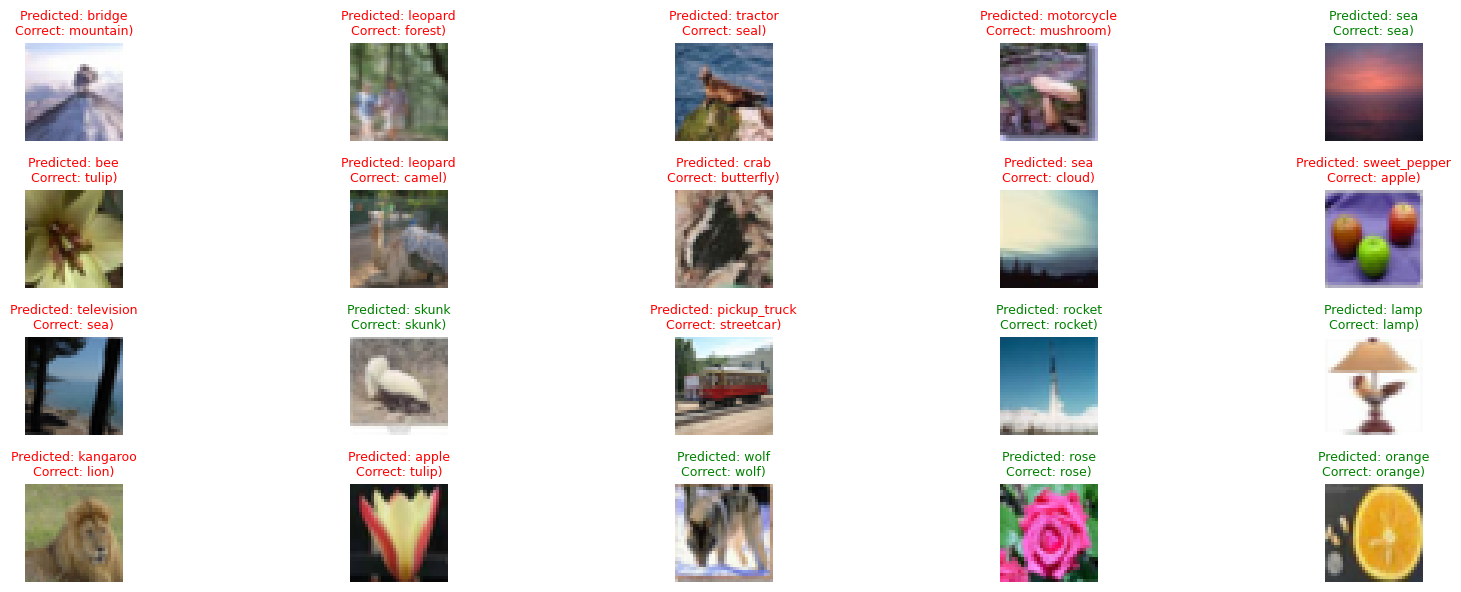

Test accuracy: 0.3199000060558319


In [164]:
# test
test_model(X_test, y_test, model)

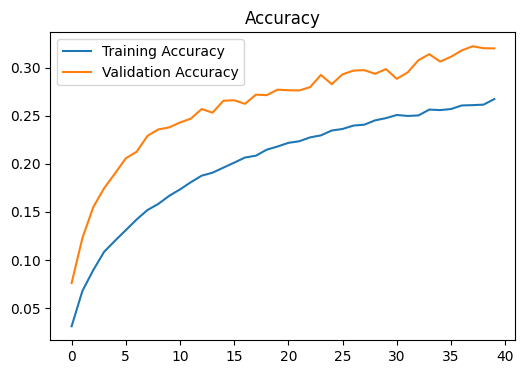

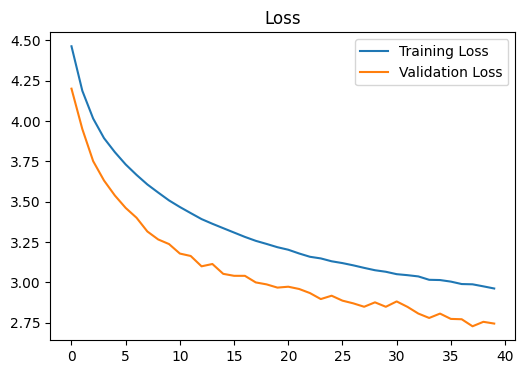

In [169]:
# plot history
plot_history(history)

# Model 3

In [190]:
from tensorflow.keras.layers import BatchNormalization  # add import

# Add data augumentation

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.1),
], name="augment")


model = tf.keras.Sequential([
    layers.Input(shape=(32, 32, 3)),
    data_augmentation,
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    BatchNormalization(),                                # NEW
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),                                # NEW
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ augment (Sequential)            │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 557,092 (2.13 MB)

 Trainable params: 556,900 (2.12 MB)

 Non-trainable params: 192 (768.00 B)

In [191]:
# complie
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [192]:
# train
callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-5, verbose=1)
]
history = model.fit(
    X_train, y_train,
    epochs=40,                  # was 20
    batch_size=128,
    shuffle=True,
    validation_data=(X_test, y_test),
    callbacks=callbacks         # NEW
)

Epoch 1/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.0273 - loss: 4.6900 - val_accuracy: 0.0719 - val_loss: 4.2672 - learning_rate: 1.0000e-04
Epoch 2/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.0726 - loss: 4.2556 - val_accuracy: 0.1447 - val_loss: 3.8717 - learning_rate: 1.0000e-04
Epoch 3/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1020 - loss: 4.0472 - val_accuracy: 0.1773 - val_loss: 3.7054 - learning_rate: 1.0000e-04
Epoch 4/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.1264 - loss: 3.8949 - val_accuracy: 0.1902 - val_loss: 3.5492 - learning_rate: 1.0000e-04
Epoch 5/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.1398 - loss: 3.7596 - val_accuracy: 0.2120 - val_loss: 3.4157 - learning_rate: 1.0000e-04
Epoch 6/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.1530 - loss: 3.6698 - val_accuracy: 0.2259 - val_loss: 3.3464 - learning_rate: 1.0000e-04
Epoch 7/40
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - acc

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


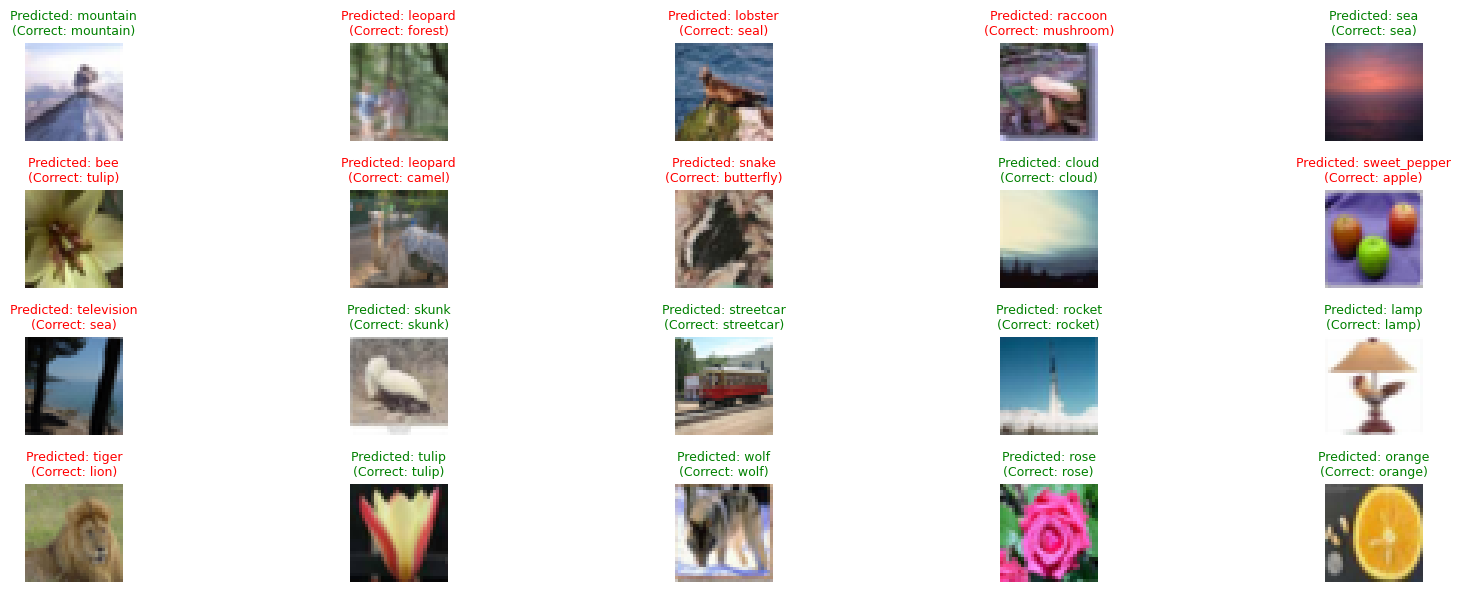

Test accuracy: 0.36890000104904175


In [197]:
# test
test_model(X_test, y_test, model)

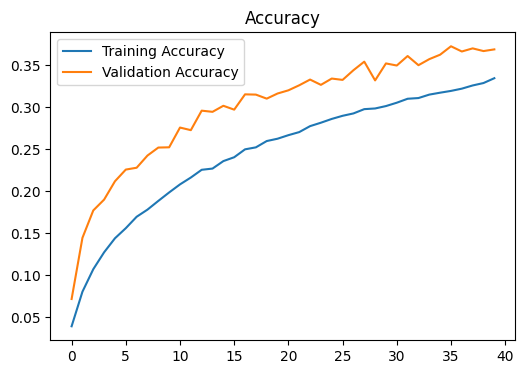

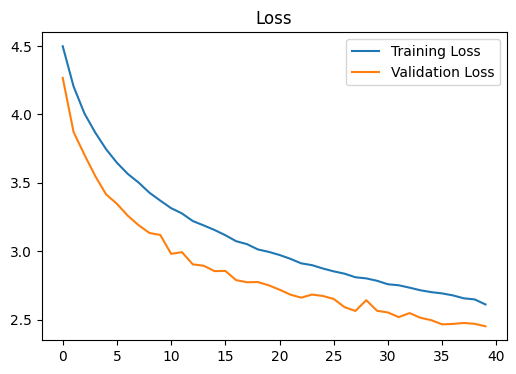

In [194]:
# plot history
plot_history(history)